In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


# Veri Seti Seçimi ve Açıklaması

Bu projede, Airline Passenger Satisfaction (Havayolu Yolcu Memnuniyeti) veri setini kullandım. Veri seti, bir hava yolu şirketinin müşterilerinin uçuş deneyimlerine ilişkin memnuniyet düzeylerini belirlemeye yönelik yapılan bir anket çalışmasından elde edilmiştir. Her bir satır, bir yolcuya ait uçuş bilgilerini ve ilgili hizmetler hakkındaki değerlendirmelerini içermektedir. Cinsiyet, müşteri türü, seyahat amacı, uçuş sınıfı, uçuş mesafesi gibi demografik ve operasyonel özelliklere ek olarak; yemek hizmeti, koltuk konforu, uçak içi eğlence gibi çeşitli hizmetler 1–5 arasında puanlanarak yer almaktadır (0 ise ilgili hizmetin kendilerine sunulmadığını gösterir). Ayrıca yolcunun uçuş sonunda genel memnuniyet durumu da (“Satisfied” veya “Neutral or Dissatisfied”) olarak belirtilmiştir. Bu projede:

* İstatistiksel özetler ile sayısal ve kategorik değişkenlerin genel eğilimlerini inceledim.

* Eksik veri analizi yaparak yalnızca tek bir değişkende yer alan eksik gözlemleri nasıl değerlendirdiğimi açıkladım.

* Aykırı değerler, uçuş mesafesi ve rötar süreleri gibi değişkenlerde grafiklerle ve istatistiksel yöntemlerle tespit ettim.

* Son olarak, hem sayısal hem de kategorik değişkenler için uygun veri görselleştirmeleri ile dağılımlar, eğilimler ve memnuniyet ilişkilerini analiz ettim.

In [4]:
#veri setini yükle
train = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/train.csv")
test = pd.read_csv("/kaggle/input/airline-passenger-satisfaction/test.csv")

In [5]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
#veri setinin tüm sütun isimleri
train.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

## Veri Seti Sütun Başlıkları Neyi İfade Ediyor?

* **Gender:** Yolcuların cinsiyeti (Kadın, Erkek)
* **Customer Type:** Müşteri türü (Sadık müşteri, sadık olmayan müşteri)
* **Age:** Yolcuların gerçek yaşı
* **Type of Travel:** Yolculuğun amacı (Kişisel Seyahat, İş Seyahati)
* **Class:** Yolcuların uçaktaki seyahat sınıfı (Business, Ekonomi, Ekonomi Plus)
* **Flight distance:** Bu yolculuğun uçuş mesafesi
* **Inflight wifi service:** Uçuş sırasındaki wifi hizmetinden memnuniyet düzeyi (0: Uygulanamaz; 1-5 arası)
* **Departure/Arrival time convenient:** Kalkış/Varış saatlerinin uygunluğundan memnuniyet düzeyi
* **Ease of Online booking:** Çevrim içi bilet rezervasyonunun kolaylığından memnuniyet düzeyi
* **Gate location:** Kapı konumundan memnuniyet düzeyi
* **Food and drink:** Yiyecek ve içecek hizmetinden memnuniyet düzeyi
* **Online boarding:** Çevrim içi biniş hizmetinden memnuniyet düzeyi
* **Seat comfort:** Koltuk rahatlığından memnuniyet düzeyi
* **Inflight entertainment:** Uçak içi eğlence sisteminden memnuniyet düzeyi
* **On-board service:** Uçak içi hizmetlerden memnuniyet düzeyi
* **Leg room service:** Bacak mesafesi hizmetinden memnuniyet düzeyi
* **Baggage handling:** Bagaj işlemlerinden memnuniyet düzeyi
* **Check-in service:** Check-in hizmetinden memnuniyet düzeyi
* **Inflight service:** Uçuş sırasındaki hizmetten memnuniyet düzeyi
* **Cleanliness:** Temizlikten memnuniyet düzeyi
* **Departure Delay in Minutes:** Kalkışta yaşanan gecikme süresi (dakika cinsinden)
* **Arrival Delay in Minutes:** Varışta yaşanan gecikme süresi (dakika cinsinden)
* **Satisfaction:** Havayolu memnuniyet düzeyi (Memnun, nötr veya memnun değil)

# İstatistiksel Özet

Analiz kapsamında hem sayısal hem de kategorik değişkenler için istatistiksel analiz yaptım.

* Sayısal değişkenler için:

    - Ortalama (mean), medyan (median), standart sapma, min–max değerleri, çeyrekler arası değerleri inceledim. Bu değerler, değişkenlerin simetrik mi sağa/sola çarpık mı olduğunu anlamamı sağladı. Bazı hizmet skorlarının ortalamaları ve medyanları karşılaştırılarak, hizmet kalitesi algısı hakkında yorumlar yaptım.
      

* Kategorik değişkenler için:

    - Frekans ve yüzde dağılımlarına baktım. Bazı değişkenler için memnuniyet değişkeniyle ilişkisi için çapraz tablo (Crosstab) oluşturdum. Aralarında ilişki olduğunu görmek için ki-kare testi uygulayarak bu kategorik değişkenlerin memnuniyet ile olan ilişkisi istatistiksel olarak test ettim ama istatistiksel anlamlılık her zaman pratikte anlamlılık anlamına gelmediği için ilişkinin gücünü ölçmek için Cramér’s V değerini hesapladım.

In [7]:
#Sayısal Değişkenler için istatistiksel analiz

# Sayısal değişkenlerin seçilmesi
numerical_cols = train.select_dtypes(include=['int64', 'float64'])

# Temel istatistiksel özet
numerical_summary = numerical_cols.describe().T  
numerical_summary

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,103904.0,51951.500000,29994.645522,0.0,25975.75,51951.5,77927.25,103903.0
id,103904.0,64924.210502,37463.812252,1.0,32533.75,64856.5,97368.25,129880.0
Age,103904.0,39.379706,15.114964,7.0,27.00,40.0,51.00,85.0
Flight Distance,103904.0,1189.448375,997.147281,31.0,414.00,843.0,1743.00,4983.0
Inflight wifi service,103904.0,2.729683,1.327829,0.0,2.00,3.0,4.00,5.0
Departure/Arrival time convenient,103904.0,3.060296,1.525075,0.0,2.00,3.0,4.00,5.0
Ease of Online booking,103904.0,2.756901,1.398929,0.0,2.00,3.0,4.00,5.0
Gate location,103904.0,2.976883,1.277621,0.0,2.00,3.0,4.00,5.0
Food and drink,103904.0,3.202129,1.329533,0.0,2.00,3.0,4.00,5.0
Online boarding,103904.0,3.250375,1.349509,0.0,2.00,3.0,4.00,5.0


In [8]:
#seat comfort sütunun modu
train["Seat comfort"].mode()

0    4
Name: Seat comfort, dtype: int64

🔎 İstatistiklere baktığımda, memnuniyet puanlarında ortalamanın(mean) 2.75, medyandan(median) 3.0 düşük olması, dağılımın sola çarpık olduğunu ve memnuniyete eğilim var. "Seat comfort" için mod ve medyanın 4, ortalamanın 3.43 olması, yolcuların çoğunun bu hizmetten memnun olduğunu ama birkaç kişinin düşük puan verdiği için ortalamayı düşürmüş. "Departure Delay in Minutes" ve "Arrival Delay in Minutes" sütunlarında çok fazla uç nokta var. Çoğu uçak tam zamanında ulaşırken bazıları rötar yapmış. Bu sütunlar için ayrıca gecikme var mı şeklinde yeni bir değişken eklemek anlamlı olabilir. \
Tabloda std(Standart Sapmaya) bakarak aykırı değerleri de görebiliriz. Mesela "Flight Distance" için std değeri **997.147281** çıkmış ve bu çok fazla. Aynı Şekilde "Departure Delay in Minutes" için std değeri 38.230901, "Arrival Delay in Minutes" için de std değeri 38.698682 çıkmış. Bunları aykırı değer kısmında ele alacağım için bu kısımla fazla ilgilenmiyorum.

In [9]:
# anketlerde hizmetler kısmında sıfır değeri de vardı ama bunlar hizmeti almadığını gösteriyor bunun için ayrıca sütunlarda bu hizmet alındı mı diye belirttim.
services = [
    'Inflight wifi service',
    'Food and drink',
    'Inflight entertainment',
    'Leg room service',
    'Online boarding'
]

for col in services:
    train[f'{col}_given'] = train[col].apply(lambda x: 0 if x == 0 else 1)

for col in services:
    test[f'{col}_given'] = test[col].apply(lambda x: 0 if x == 0 else 1)

Yukarıdaki kod, örneğin Inflight wifi service_given adında 0 veya 1’lik yeni bir sütun oluşturur:
- 1: Yolcu bu hizmeti almış.
- 0: Yolcu bu hizmeti hiç almamış.

In [10]:
#Yolcuların hizmeti alıp, almadığına göre memnuniyet seviyeleri
train[['satisfaction', 'Inflight wifi service_given']].groupby('Inflight wifi service_given').value_counts(normalize=True)

Inflight wifi service_given  satisfaction           
0                            satisfied                  0.997422
                             neutral or dissatisfied    0.002578
1                            neutral or dissatisfied    0.584032
                             satisfied                  0.415968
Name: proportion, dtype: float64

#### ‼️Bundan şu sonuç çıkıyor **wifi hizmeti almayanlar(0)** uçuştan %99.7 memnun, %0.2 si memnun değil. Ama **wifi hizmeti alanlar** ise %41.6 sı memnun, %58.4 ü memnun değil. demek ki hizmet almayanlar zaten bu hizmetten bi beklentileri yoktu ama wifi hizmeti alanların bi beklentisi vardı ve bu beklenti karşılanamamış.

In [11]:
# Önceki kodda sadece bir hizmet için sonuçları görmüştüm şimdi tüm hizmetlerin alınıp, alınmama durumuna göre memnuniyetlerine bakacağım
results = []

for service in services:
    given_column = f"{service}_given"
    
    # Her hizmet için 0 ve 1'e karşılık gelen satisfaction oranları
    pivot = train.groupby([given_column, 'satisfaction']).size().unstack().fillna(0)
    pivot = pivot.div(pivot.sum(axis=1), axis=0)
    
    # İsimleri daha okunaklı hale getirme
    service_name = service.replace('_', ' ').title()
    
    results.append((service_name, pivot))

# Her biri için çıktı ver
for service_name, table in results:
    print(f"\n--- {service_name} ---")
    print(table)


--- Inflight Wifi Service ---
satisfaction                 neutral or dissatisfied  satisfied
Inflight wifi service_given                                    
0                                           0.002578   0.997422
1                                           0.584032   0.415968

--- Food And Drink ---
satisfaction          neutral or dissatisfied  satisfied
Food and drink_given                                    
0                                    0.532710   0.467290
1                                    0.566702   0.433298

--- Inflight Entertainment ---
satisfaction                  neutral or dissatisfied  satisfied
Inflight entertainment_given                                    
0                                            1.000000   0.000000
1                                            0.566609   0.433391

--- Leg Room Service ---
satisfaction            neutral or dissatisfied  satisfied
Leg room service_given                                    
0                        

### Bu oranları aşağıdaki grafiklerde daha net görelim ⬇️⬇️

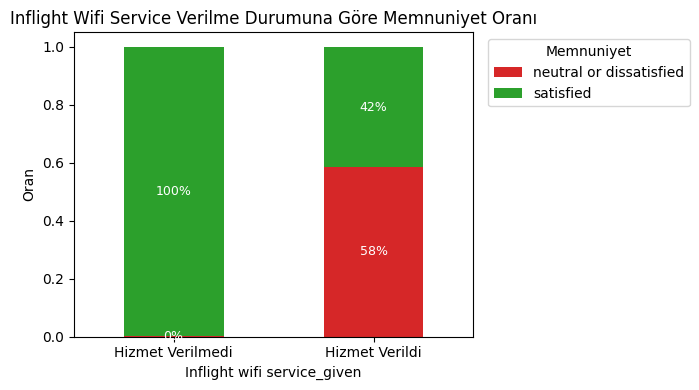

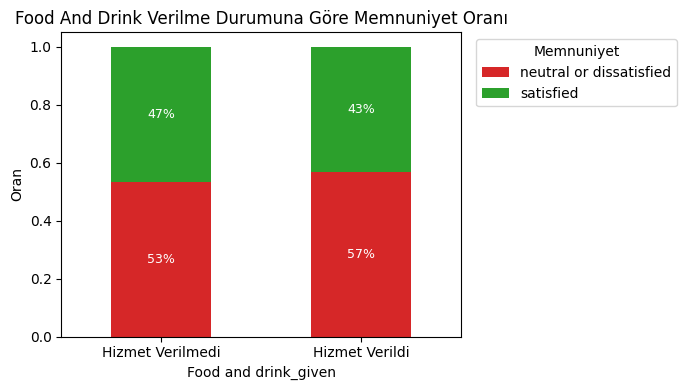

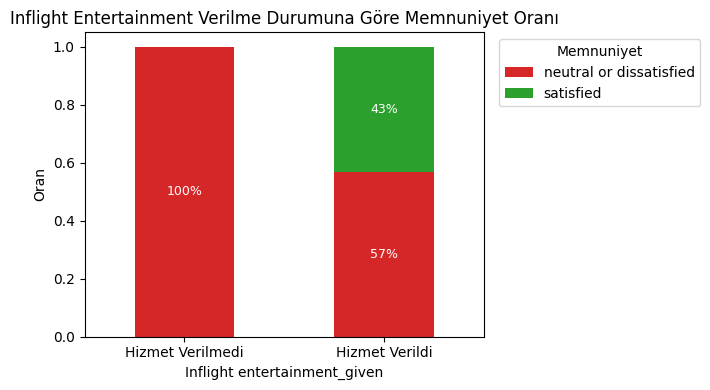

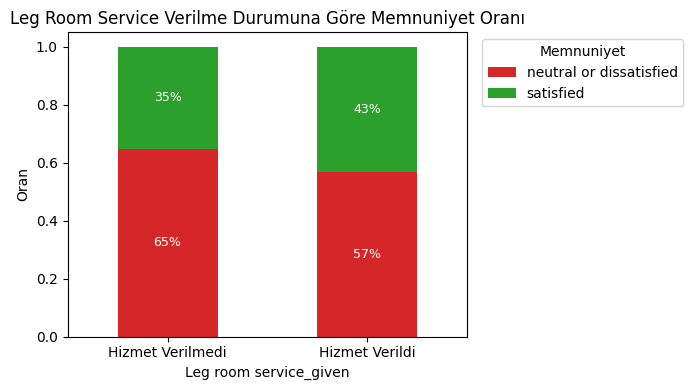

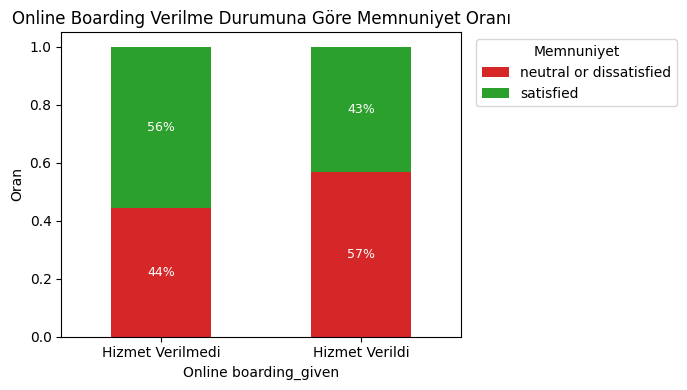

In [12]:
#Yukarıdaki değerlerin grafikleri için
import matplotlib.pyplot as plt

colours = {
    'satisfied': '#2ca02c',  # yeşil
    'neutral or dissatisfied': '#d62728'  # kırmızı
}

services = [
    'Inflight wifi service',
    'Food and drink',
    'Inflight entertainment',
    'Leg room service',
    'Online boarding'
]

for service in services:
    given_column = f"{service}_given"

    # Geçerli verileri filtrele (NaN varsa)
    tmp = train[[given_column, 'satisfaction']].dropna()
    
    # Gruplandır ve oranla
    ratio_df = tmp.groupby([given_column, 'satisfaction']).size().unstack()
    ratio_df = ratio_df.div(ratio_df.sum(axis=1), axis=0)
    
    # Sıra garantisi: 0 ve 1 varsa, göster
    if 0 not in ratio_df.index:
        ratio_df.loc[0] = [0, 0]
    if 1 not in ratio_df.index:
        ratio_df.loc[1] = [0, 0]
    
    # Sıralı index
    ratio_df = ratio_df.sort_index()

    # Grafik
    fig, ax = plt.subplots(figsize=(7, 4))
    bar_container = ratio_df.plot(kind='bar', stacked=True,
                                 color=[colours.get(c, 'gray') for c in ratio_df.columns],
                                 ax=ax)

    ax.set_title(f"{service.replace('_', ' ').title()} Verilme Durumuna Göre Memnuniyet Oranı")
    ax.set_ylabel("Oran")
    ax.set_xticklabels(['Hizmet Verilmedi', 'Hizmet Verildi'], rotation=0)
    ax.legend(title='Memnuniyet', bbox_to_anchor=(1.02, 1), loc='upper left')

    # Oranları yaz
    for i, bars in enumerate(bar_container.containers):
        for bar in bars:
            height = bar.get_height()
            if height > 0:
                ax.text(bar.get_x() + bar.get_width() / 2,
                        bar.get_y() + height / 2,
                        f"{height:.0%}",  # yüzde olarak yaz
                        ha='center', va='center', fontsize=9, color='white')

    plt.tight_layout()
    plt.show()

**Kategorik veriler için istatistiksel analiz ⬇️**

In [13]:
# Cinsiyetin dağılımına, kadın ve erkek yolcuların memnuniyetine bakalım:

from IPython.display import display, HTML #tablolar küçük olduğu için alt alta değilde yan yana durmasını istediğim için bu kütüphaneyi kullandım

# Frekans Dağılımı Tablosu
freq = train['Gender'].value_counts().rename_axis('Gender').reset_index(name='Count')
# Yüzdelik Dağılım Tablosu
percent = train['Gender'].value_counts(normalize=True).mul(100).rename_axis('Gender').reset_index(name='Percentage')
# Crosstab (Çapraz Tablo)
crosstab = pd.crosstab(train['Gender'], train['satisfaction'], normalize='index').mul(100).round(2).reset_index()

# HTML ile yan yana yerleştirme
html_output = f"""
<div style="display: flex; gap: 40px;">
  <div>{freq.to_html(index=False)}</div>
  <div>{percent.to_html(index=False)}</div>
  <div>{crosstab.to_html(index=False)}</div>
</div>
"""

display(HTML(html_output))

**Yolcuların cinsiyet dağılımı oldukça dengelidir; verinin yaklaşık %50.7’si kadın, %49.3’ü erkektir. Memnuniyet düzeyine bakıldığında, kadın yolcuların %42.7’si memnunken, erkek yolcuların %43.9’u memnundur. Peki cinsiyet ve memnuniyet arasında bir ilişki var mı?**

In [14]:
# Cinsiyet ve memnuniyet arasında bir ilişki var mı? Buna istatistiksel olarak bakayım
from scipy.stats import chi2_contingency

# Önce çapraz tabloyu oluşturdum
contingency_table = pd.crosstab(train['Gender'], train['satisfaction'])

# Ki-kare testini uyguladım
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-kare istatistiği: {chi2}")
print(f"p-değeri: {p}")

if p < 0.05:
    print("Sonuç anlamlı: Cinsiyet ile memnuniyet arasında ilişki var.")
else:
    print("Sonuç anlamsız: Cinsiyet ile memnuniyet arasında anlamlı ilişki yok.")

Ki-kare istatistiği: 15.44441742614322
p-değeri: 8.496755458033522e-05
Sonuç anlamlı: Cinsiyet ile memnuniyet arasında ilişki var.


Sonuç, cinsiyet ve memnuniyet arasında ilişki olduğunu söylüyor. Ama bu pek mantıklı değil. İlişkiye bakmak için Cramér's V değerine bakacağım. Böylece arasındaki ilişki güçlü mü yoksa zayıf bir ilişki mi ona karar vereceğim. Çıkan değere güçlü ve zayıf ilişkiyi belirlemek için:

Cramer's V Yorumlama:
- 0.00–0.10 → Çok zayıf ilişki
- 0.10–0.20 → Zayıf ilişki
- 0.20–0.40 → Orta düzeyde ilişki
- 0.40+ → Güçlü ilişki

In [15]:
# Değerler arasındaki ilişki güçlü mü yoksa zayıf mı olduğunu belirlemek için Cramér's V değerine bak

# Toplam gözlem sayısı
n = contingency_table.sum().sum()

# Cramér's V hesaplama
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.012191850597584968


**‼️Cinsiyetin memnuniyetle çok zayıf bir ilişkisi olduğunu gördük bu yüzden ki kare de sonuç anlamlı çıksa da gerçek hayatta o kadar da anlamlı ve önemli değil.‼️**

#### Diğer sütunlar içinde aynı kodu uygulayayım

In [16]:
# Önce çapraz tabloyu oluştur
contingency_table = pd.crosstab(train['Customer Type'], train['satisfaction'])

# Ki-kare testini uygula
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-kare istatistiği: {chi2}")
print(f"p-değeri: {p}")

if p < 0.05:
    print("Sonuç anlamlı: müşteri tipi ile memnuniyet arasında ilişki var.")
else:
    print("Sonuç anlamsız: müşteri tipi ile memnuniyet arasında anlamlı ilişki yok.")

# Toplam gözlem sayısı
n = contingency_table.sum().sum()

# Cramér's V hesaplama
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v}")

Ki-kare istatistiği: 3657.2808045981465
p-değeri: 0.0
Sonuç anlamlı: müşteri tipi ile memnuniyet arasında ilişki var.
Cramér's V: 0.18761303964984952


In [17]:
# Önce çapraz tabloyu oluştur
contingency_table = pd.crosstab(train['Type of Travel'], train['satisfaction'])

# Ki-kare testini uygula
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-kare istatistiği: {chi2}")
print(f"p-değeri: {p}")

if p < 0.05:
    print("Sonuç anlamlı: Seyahat tipi ile memnuniyet arasında ilişki var.")
else:
    print("Sonuç anlamsız: Seyahat tipi ile memnuniyet arasında anlamlı ilişki yok.")

# Toplam gözlem sayısı
n = contingency_table.sum().sum()

# Cramér's V hesaplama
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v}")

Ki-kare istatistiği: 20945.233826061667
p-değeri: 0.0
Sonuç anlamlı: Seyahat tipi ile memnuniyet arasında ilişki var.
Cramér's V: 0.44897945977699316


### 🥳🎉 Seyahat tipi ile memnuniyet arasında çok güçlü bir ilişki var

In [18]:
# Önce çapraz tabloyu oluştur
contingency_table = pd.crosstab(train['Class'], train['satisfaction'])

# Ki-kare testini uygula
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Ki-kare istatistiği: {chi2}")
print(f"p-değeri: {p}")

if p < 0.05:
    print("Sonuç anlamlı: sınıf ile memnuniyet arasında ilişki var.")
else:
    print("Sonuç anlamsız: sınıf ile memnuniyet arasında anlamlı ilişki yok.")

import numpy as np

# Toplam gözlem sayısı
n = contingency_table.sum().sum()

# Cramér's V hesaplama
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Cramér's V: {cramers_v}")

Ki-kare istatistiği: 26471.86294449228
p-değeri: 0.0
Sonuç anlamlı: sınıf ile memnuniyet arasında ilişki var.
Cramér's V: 0.5047497579440323


### 🥳🎉 Sınıf ile memnuniyet arasında da çok güçlü bir ilişki var

Bu sonuçlara dayanarak uçuş sınıfı ve seyahat tipi, yolcu memnuniyetini güçlü şekilde etkileyen bir faktörlerdir. Ve bunlar model için kullanılabilir.

**peki sayısal değerlerde korelasyona nasıl bakarım?**

In [19]:
#Sayısal değerlerdeki korelasyona bakmak için 

# satisfaction sütununu binary hale getir (0: kötü, 1: iyi)
train['satisfaction_binary'] = train['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

# Korelasyonlarını al
corr_target = train.corr(numeric_only=True)['satisfaction_binary'].sort_values(ascending=False)
print(corr_target)

satisfaction_binary                  1.000000
Online boarding                      0.503557
Inflight entertainment               0.398059
Seat comfort                         0.349459
On-board service                     0.322383
Leg room service                     0.313131
Cleanliness                          0.305198
Flight Distance                      0.298780
Inflight wifi service                0.284245
Baggage handling                     0.247749
Inflight service                     0.244741
Checkin service                      0.236174
Food and drink                       0.209936
Ease of Online booking               0.171705
Age                                  0.137167
id                                   0.013734
Leg room service_given               0.011129
Inflight entertainment_given         0.010151
Gate location                        0.000682
Food and drink_given                -0.002200
Unnamed: 0                          -0.004731
Online boarding_given             

🔎❗ Korelasyona bakıldığında, müşteri memnuniyetini en çok etkileyen faktörlerin başında online biniş işlemleri **Online boarding 0.50**, uçak içi eğlence **Inflight entertainment 0.39**, koltuk konforu **Seat comfort 0.34** ve **On-board service, Leg room service, Cleanliness	0.3** civarı gibi hizmet kalitesiyle doğrudan ilişkili unsurlar gelmektedir. Bu değişkenlerin memnuniyetle yüksek pozitif korelasyon göstermesi, yolcuların seyahat deneyiminde bu hizmetleri öncelikli olarak değerlendirdiğini göstermektedir. Öte yandan, Inflight wifi service_given değişkeni memnuniyetle negatif korelasyon göstermiştir; bu durum, verilen WiFi hizmetinin beklentileri karşılamadığı veya kalitesiz sunulduğu anlamına gelebilir. Bu tür negatif korelasyonlar, hizmetin sunulmasının tek başına yeterli olmadığını, kalitesinin de müşteri memnuniyeti açısından kritik olduğunu ortaya koymaktadır. Sonuç olarak, havayolu şirketleri müşteri deneyimini iyileştirmek istiyorsa yalnızca hizmetleri sunmakla kalmamalı, aynı zamanda bu hizmetlerin performansını ve kullanıcı algısını da göz önünde bulundurmalıdır.

# Eksik Değer Analizi 

Veri setinde Arrival Delay in Minutes sütununda, 310 tane eksik veri var. Veri setinde ise 103.904 gözlem var. Eksik veriler, veri setinin tamamına kıyaslandığında %0.3 gibi bir oran çıkıyor. %0.5 ten küçük olduğu için eksik verileri silmeye karar verdim. Eğer eksik veri fazla olsaydı sütunun medyan değeri ile doldurup ayrı bir sütunda verinin sonradan doldurulduğunu belirtirdim.

In [20]:
train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [21]:
train = train.dropna(subset=["Arrival Delay in Minutes"])
test = test.dropna(subset=["Arrival Delay in Minutes"])

# Aykırı Değer Analizi

- İstatistiksel Özet kısmında, aykırı değerlere değinmiştim. İstatistiksel tabloda std(Standart Sapmaya) bakarak aykırı değerleri görmüştüm. Mesela "Flight Distance" için std değeri **997.147281** çıkmış ve bu çok fazla. Aynı Şekilde "Departure Delay in Minutes" için std değeri 38.230901, "Arrival Delay in Minutes" için de std değeri 38.698682 çıkmış. 

- Veri setinde yer alan aykırı değerler, istatistiksel analizlerin ve modelleme sürecinin doğruluğunu olumsuz etkileyebilir. Özellikle uçuş mesafesi, gecikme süreleri gibi sayısal değişkenlerde uç değerlerin varlığı hem ortalama gibi özet istatistikleri bozabilir hem de görselleştirmeleri yanıltıcı hale getirebilir. Bu nedenle, analiz öncesinde aykırı değerler belirlenmiş ve gerektiğinde veri dışına alınarak veri setinin geneline daha uygun, dengeli bir yapı elde edilmiştir. Bu adım, daha sağlıklı yorumlar yapılabilmesi ve modelleme sürecinde daha güvenilir sonuçlara ulaşılabilmesi için önemlidir.

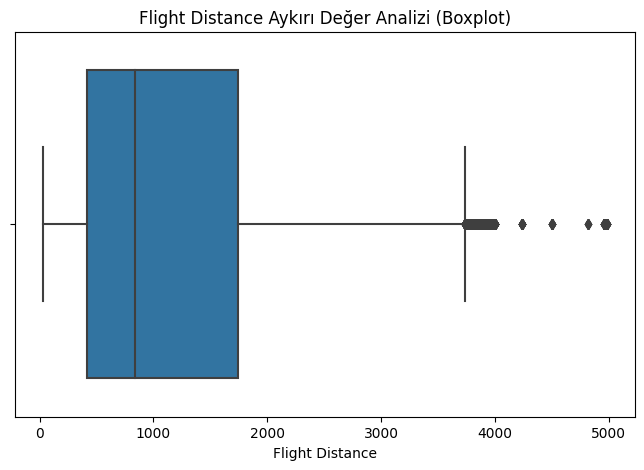

In [22]:
#Flight Destence için aykırı değer analizi
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=train["Flight Distance"])
plt.title("Flight Distance Aykırı Değer Analizi (Boxplot)")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


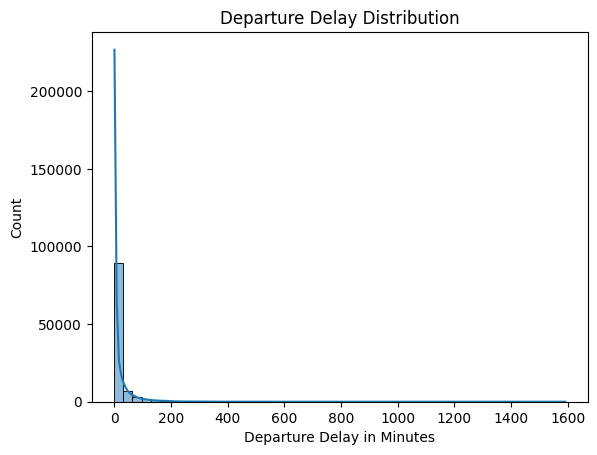

In [23]:
#Departure Delay in Minutes için aykırı değer analizi
sns.histplot(train["Departure Delay in Minutes"], kde=True, bins=50)
plt.title("Departure Delay Distribution")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


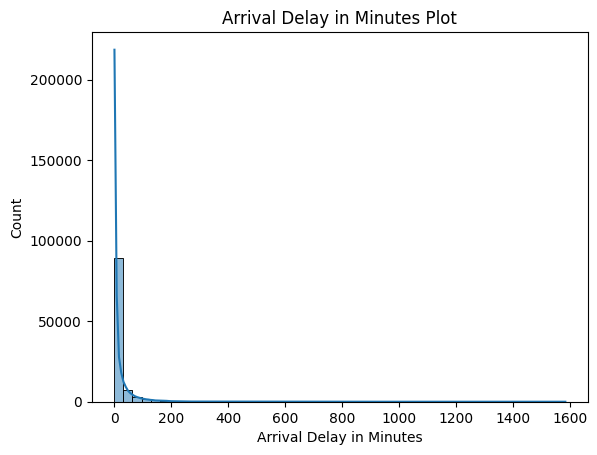

In [24]:
#Arrival Delay in Minutes için aykırı değer analizi
sns.histplot(train["Arrival Delay in Minutes"], kde=True, bins=50)
plt.title("Arrival Delay in Minutes Plot")
plt.show()

In [25]:
#Aykırı değerleri silen fonksiyon
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df


train = remove_outliers_iqr(train, "Flight Distance")
train = remove_outliers_iqr(train, "Departure Delay in Minutes")
train = remove_outliers_iqr(train, "Arrival Delay in Minutes")

✔️ Aykırı değerleri sildikten sonra görselleştirmeleri tekrar yapıp aradaki farkı görebiliriz

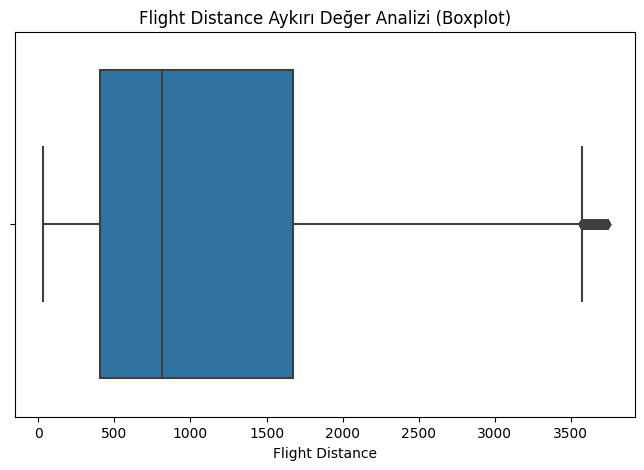

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


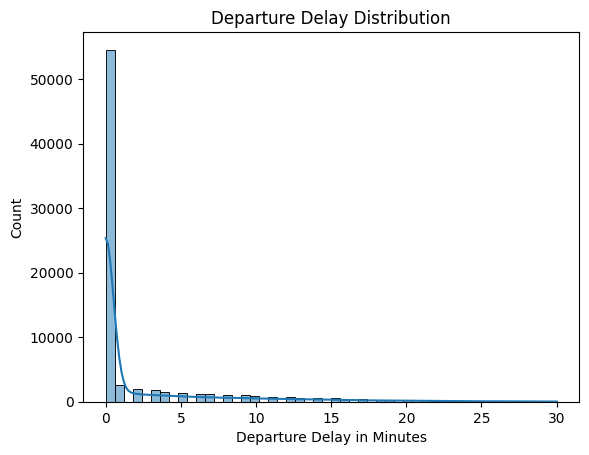

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


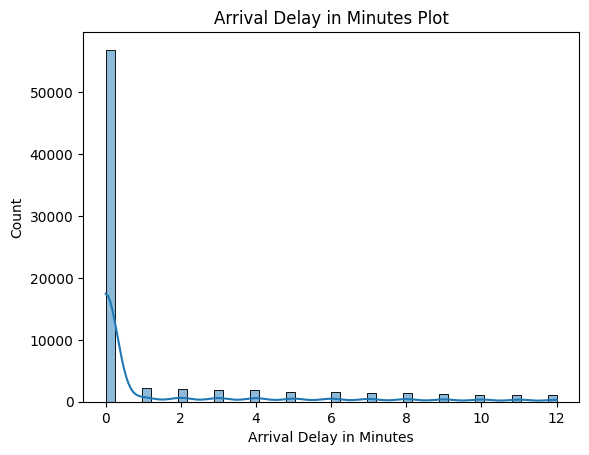

In [26]:
#Flight Destence için aykırı değer analizi
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.boxplot(x=train["Flight Distance"])
plt.title("Flight Distance Aykırı Değer Analizi (Boxplot)")
plt.show()

#Departure Delay in Minutes için aykırı değer analizi
sns.histplot(train["Departure Delay in Minutes"], kde=True, bins=50)
plt.title("Departure Delay Distribution")
plt.show()

#Arrival Delay in Minutes için aykırı değer analizi
sns.histplot(train["Arrival Delay in Minutes"], kde=True, bins=50)
plt.title("Arrival Delay in Minutes Plot")
plt.show()

# Görselleştirme

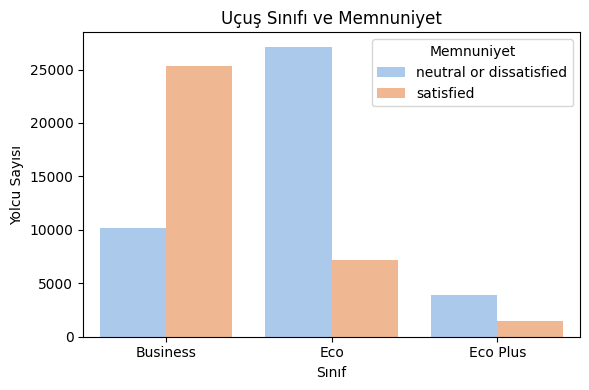

In [27]:
#Sınıf ile memnuniyet arasında güçlü bir ilişki olduğunu bulmuştum, bunu görselleştirellim
plt.figure(figsize=(6,4))
sns.countplot(data=train, x="Class", hue="satisfaction", palette="pastel")
plt.title("Uçuş Sınıfı ve Memnuniyet")
plt.xlabel("Sınıf")
plt.ylabel("Yolcu Sayısı")
plt.legend(title="Memnuniyet")
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


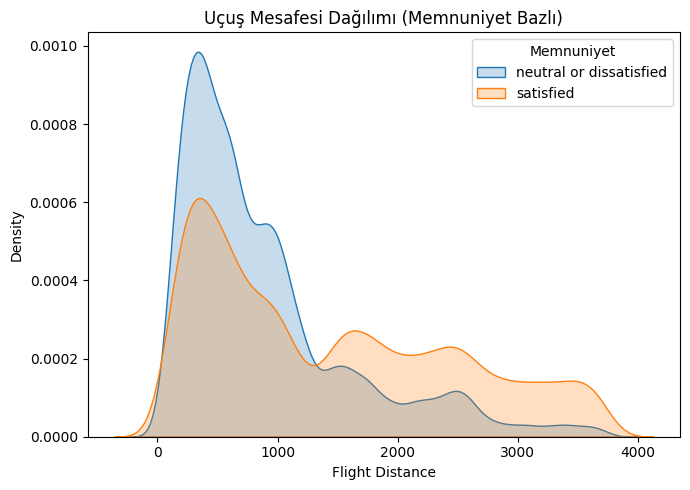

In [30]:
#Uçuş mesafesine göre memnuniyeti gösteren grafik
plt.figure(figsize=(7,5))
for label in train["satisfaction"].unique():
    sns.kdeplot(train[train["satisfaction"] == label]["Flight Distance"], label=label, fill=True)

plt.title("Uçuş Mesafesi Dağılımı (Memnuniyet Bazlı)")
plt.xlabel("Flight Distance")
plt.legend(title="Memnuniyet")
plt.tight_layout()
plt.show()

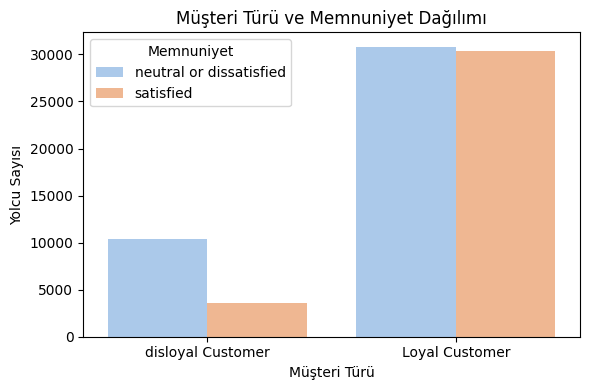

In [36]:
# müşteri türü dağılımı
plt.figure(figsize=(6,4))
sns.countplot(data=train, x="Customer Type", hue="satisfaction", palette="pastel")
plt.title("Müşteri Türü ve Memnuniyet Dağılımı")
plt.xlabel("Müşteri Türü")
plt.ylabel("Yolcu Sayısı")
plt.legend(title="Memnuniyet")
plt.tight_layout()
plt.show()

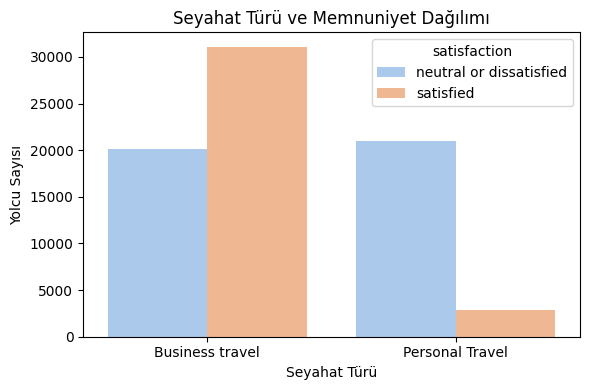

In [35]:
#Seyahat Türü (Business vs Personal) (Type of Travel) Grafiği
plt.figure(figsize=(6,4))
sns.countplot(data=train, x="Type of Travel", hue="satisfaction", palette="pastel")
plt.title("Seyahat Türü ve Memnuniyet Dağılımı")
plt.xlabel("Seyahat Türü")
plt.ylabel("Yolcu Sayısı")
plt.tight_layout()
plt.show()

Grafiğe baktığımda, iş seyahati yapan yolcuların kişisel seyahat yapanlara göre daha memnun olduklarını fark ettim. Aklıma gelen ilk şey şu oldu: İş seyahatleri genelde şirketler tarafından finanse ediliyor ve bu yüzden bu yolcular daha konforlu sınıflarda (örneğin Business Class veya Eco Plus) uçuyor olabilirler. Bu da doğal olarak memnuniyetlerini artırıyor.   

In [37]:
#seyahat türlerine göre sınıflar
pd.crosstab(train['Type of Travel'], train['Class'], normalize='index') * 100

Class,Business,Eco,Eco Plus
Type of Travel,,,
Business travel,66.250415,28.340910,5.408675
Personal Travel,6.460651,82.512336,11.027013


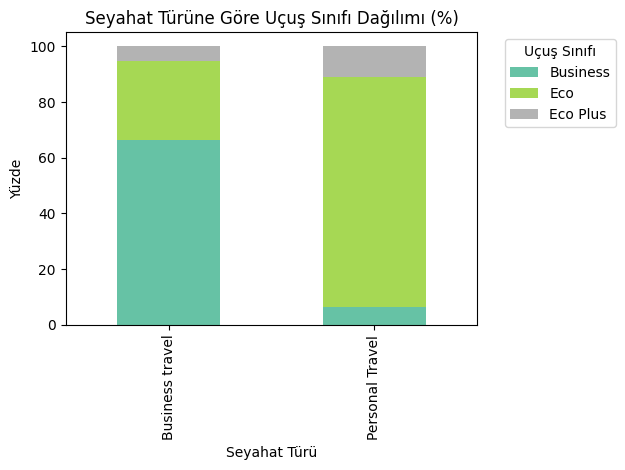

In [38]:
#yukarıdaki tablonun görselleştirmesi
travel_class_dist = pd.crosstab(train['Type of Travel'], train['Class'], normalize='index') * 100
travel_class_dist.plot(kind='bar', stacked=True, colormap='Set2')
plt.title("Seyahat Türüne Göre Uçuş Sınıfı Dağılımı (%)")
plt.ylabel("Yüzde")
plt.xlabel("Seyahat Türü")
plt.legend(title="Uçuş Sınıfı", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

✔️ Varsayımımı ispat etmek için seyahat türüyle uçuş sınıfı arasındaki ilişkiye baktım. İş seyahati çoğunlukla business te olmuş ve bu da iş seyahatlerinde memnuniyetin artmasına sebep oluyor. Yani doğru düşünmüşüm. Uçuş sınıfı arttıkça, memnuniyet de artıyor.

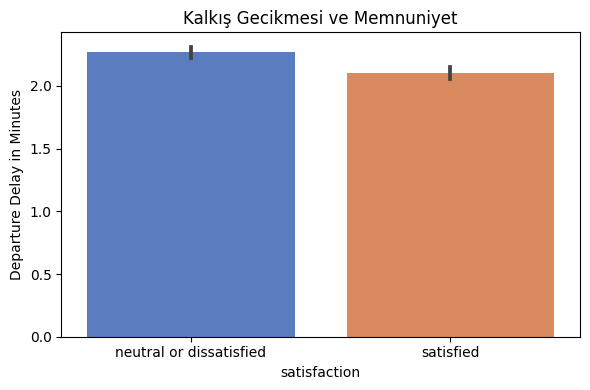

In [39]:
# Gecikmeler memnuniyeti nasıl etkiliyor?
plt.figure(figsize=(6,4))
sns.barplot(data=train, x="satisfaction", y="Departure Delay in Minutes", palette="muted")
plt.title("Kalkış Gecikmesi ve Memnuniyet")
plt.tight_layout()
plt.show()

Uçak kalkışındaki gecikmeler de doğal olarak memnuniyeti olumsuz etkiliyor

**SONUÇ**\
Bu çalışma kapsamında, Airline Passenger Satisfaction veri seti üzerinden kapsamlı bir veri analizi gerçekleştirdim. Öncelikle veri setinin yapısını inceledim, eksik ve aykırı değerleri tespit edip uygun şekilde işledim. Kategorik ve sayısal değişkenler için hem istatistiksel özetler çıkardım hem de çeşitli görselleştirmelerle dağılımları analiz ettim.

Yaptığım analizlerde özellikle dikkat çeken bulgulardan biri, seyahat türü, uçuş sınıfı ve memnuniyet arasındaki güçlü ilişkilerdi. İş seyahati yapan yolcuların daha yüksek sınıflarda uçtukları için genel olarak daha memnun kaldıkları gözlemlendi. Ayrıca, bazı hizmetlerin (örneğin online boarding, inflight entertainment) memnuniyet ile pozitif korelasyon gösterdiği de tespit edildi.

Bu analiz, havayolu firmalarının müşteri memnuniyetini artırmak için hangi alanlara odaklanması gerektiği konusunda fikir verebilir. Daha ileri çalışmalar için, bu veri seti üzerinde bir makine öğrenmesi modeli kurarak memnuniyet tahmini yapılabilir.

### *Teşekkürler,*
### **Zeynep AÇIKGÖZ**